In [5]:
from math import *

def f(mu, sigma2, x):
    return 1/sqrt(2.*pi*sigma2) * exp(-.5*(x-mu)**2/sigma2)
print f(10., 4., 8.)

0.12098536226


In [1]:
p =[0.2, 0.2, 0.2, 0.2, 0.2] # p is uniform distribution. 
n =5
print p

[0.2, 0.2, 0.2, 0.2, 0.2]


In [8]:
q =[]
n = 5
for i in range(n):
    q.append(1.0/n) # p is uniform distribution. 
print q

0.2
[0.2, 0.2, 0.2, 0.2, 0.2]


In [15]:
q =[]
n = 5
for i in range(n):
    q.append(1.0/n) # p is uniform distribution. 
color =['g','r','r','g','g']
for i in range(len(q)):
    if(color[i] == 'g'):
        q[i] = 0.2*q[i]
    else:
        q[i] = 0.6*q[i]
sum_val = sum(q)
# now normalize
for i in range(len(q)):
    q[i] = q[i]/sum_val
print sum(q)

1.0


In [25]:
p =[]
n = 5
color =['g','r','r','g','g']
for i in range(n):
    p.append(1./n)
pHit = 0.6
pMiss = 0.2
for i in range(len(p)):
    if(color[i] == 'r'):
        p[i] = p[i]*pHit
    else:
        p[i] = p[i]*pMiss
print p
# now normalize
sum_val = sum(p)
print(sum_val)
for i in range(n):
    p[i] = p[i]/sum_val
print p

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]


# Sense function definition

In [41]:
p=[]
n = 5
for i in range(n):
    p.append(1./n)
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q
#
#ADD YOUR CODE HERE
#
for measurement in measurements:
    p = sense(p, measurement)
    
print p

[0.20000000000000004, 0.19999999999999996, 0.19999999999999996, 0.20000000000000004, 0.20000000000000004]


# Robot Movement with probabilities

In [49]:
#Program a function that returns a new distribution 
#q, shifted to the right by U units. If U=0, q should 
#be the same as p.

p=[0, 1, 0, 0, 0]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    move_pos = 1
    it = 0
    curr = 1
    prev = 0
    temp = p[prev]
    while(it < len(p)):
        print p[prev]
        temp1 = p[curr]
        p[curr] = temp
        temp = temp1
        prev = curr
        curr = (curr+1)%(len(p)-1)
        it = it+1
    return p

print move(p, 1)

0
0
1
0
0
[0, 0, 1, 0, 0]


# InExact move Funciton

In [70]:
#Modify the move function to accommodate the added 
#probabilities of overshooting or undershooting 
#the intended destination.

p=[0., 1, 0., 0., 0.]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)):
        q[i] = q[i] / s
    return q

def move(p, U):
    q = []
    for i in range(len(p)):
        s = pExact * p[(i-U)%len(p)]
        s = s + pOvershoot * p[(i-U-1) %len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        q.append(s)
    return q
res = move(p, 1)
for i in range(1000):
    res = move(res, 1)
print res


[0.2000000000000035, 0.20000000000000365, 0.20000000000000373, 0.20000000000000365, 0.2000000000000035]


# Sense and Move

In [73]:
#Given the list motions=[1,1] which means the robot 
#moves right and then right again, compute the posterior 
#distribution if the robot first senses red, then moves 
#right one, then senses green, then moves right again, 
#starting with a uniform prior distribution.

p=[0.2, 0.2, 0.2, 0.2, 0.2] # 1. Belief
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'red']
motions = [1,1]
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)): # 2. product of probability
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    s = sum(q)
    for i in range(len(q)): # 3.  Normalization
        q[i] = q[i] / s
    return q

def move(p, U):
    q = []
    # https://www.youtube.com/watch?time_continue=102&v=byZ-BzbQA5M&feature=emb_logo
    for i in range(len(p)): # 4. Motion = convolution(Addition) Total probability
        s = pExact * p[(i-U) % len(p)]
        s = s + pOvershoot * p[(i-U-1) % len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        q.append(s)
    return q
#
# ADD CODE HERE
#
for k in range(len(measurements)):
    p = sense(p, measurements[k])
    p = move(p, motions[k])
    
print p         


[0.07882352941176471, 0.07529411764705884, 0.22470588235294123, 0.4329411764705882, 0.18823529411764706]


Entropy
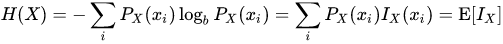


# Bayes Rule
X = grid cell Z = measurments
P(X/Z) = P(Z/X)*P(Xi) / P(Z)

Bayes Rule: https://www.youtube.com/watch?time_continue=3&v=sA5wv56qYc0&feature=emb_logo

Bayes Rule Quiz https://www.youtube.com/watch?v=SZ6Jg1wS604&feature=emb_logo

Bayes rule answer https://www.youtube.com/watch?v=OgC5M2XdIac&feature=emb_logo

Total probability https://www.youtube.com/watch?time_continue=102&v=byZ-BzbQA5M&feature=emb_logo

In [79]:
# There are hundred people
# 1. The probability a person is having cancer is pC = 0.001
# 2. The probability a person don'thave cancer is pNC = 0.999
# 3. The probability a person is psotivie given cancer P(POS/C) = 0.8
# 4. The probability a person is positive given Not Cancer P(POS/NC) = 0.1
pC = 0.001 # pC = 0.001
pNC = 0.999 #  pNC = 0.999
P_POS_C = 0.8 # P(POS/C) = 0.8
P_POS_NC = 0.1 # P(POS/NC) = 0.1

# what is P_C_POS
# The probability that a person is positive given positive resul
P_POS_C1 = pC*P_POS_C
# The probability that aperson is positive given that poistive but not cancer
P_POS_C2 = pNC*P_POS_NC

# normalization
P_Z = P_POS_C1 + P_POS_C2

# The probability that a person is cancer given positive
P_C_POS = P_POS_C1/P_Z
print P_C_POS



0.00794438927507


# Total Probability
Total Probabiliy: https://www.youtube.com/watch?time_continue=102&v=byZ-BzbQA5M&feature=emb_logo

Quiz 1 Total Probability: https://www.youtube.com/watch?time_continue=31&v=hzDsYZ61D5M&feature=emb_logo

Answer: https://www.youtube.com/watch?time_continue=28&v=ASUXN9Ay35M&feature=emb_logo

Quiz2 Total Probability: https://www.youtube.com/watch?v=2PZHPjyYnMg&feature=emb_logo

Answer : https://www.youtube.com/watch?time_continue=1&v=_AhoOd8YUK0&feature=emb_logo



In [86]:
print(0.0999/(0.1*0.999+0.9*0.001))

0.991071428571
